<h2 style="color:green" align="center">Machine Learning With Python: Linear Regression With One Variable</h2>

<h3 style="color:purple">Sample problem of predicting home price in monroe, new jersey (USA)</h3>

Below table represents current home prices in monroe township based on square feet area, new jersey

**Problem Statement**: Given above data build a machine learning model that can predict home prices based on square feet area


Linear equation:
price of home= ax + b  = m * (area_sq) + b

Generic form of same equation is,

<img src="linear_equation.png" >

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/sample_data/area.csv')
df

,area,prices
0,845,495000
1,1375,475000
2,1623,275000
3,1568,74900
4,1812,930000
5,4155,1489000
6,2391,490990
7,1700,400000
8,2356,385000
9,1050,349900


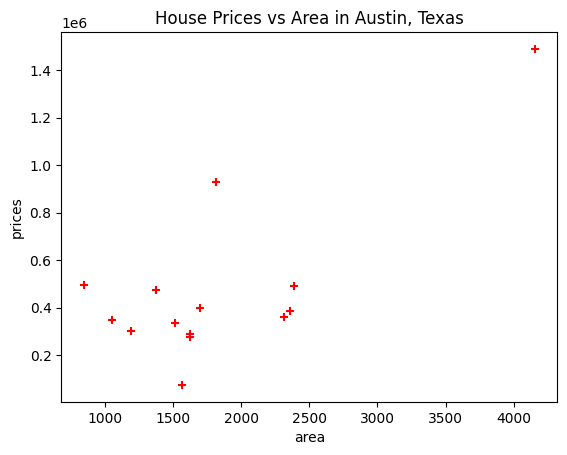

In [3]:

#plt.xlabel('area')
#plt.ylabel('prices')
#plt.scatter(df.area,df.prices,color='red',marker='+')

plt.xlabel('area')
plt.ylabel('prices')
plt.scatter(df['area'], df['prices'], color='red', marker='+')
plt.title('House Prices vs Area in Austin, Texas')
plt.show()


In [4]:
new_df = df.drop('prices',axis='columns')
new_df

,area
0,845
1,1375
2,1623
3,1568
4,1812
5,4155
6,2391
7,1700
8,2356
9,1050


In [5]:
prices = df.prices
prices

0      495000
1      475000
2      275000
3       74900
4      930000
5     1489000
6      490990
7      400000
8      385000
9      349900
10     299900
11     290000
12     335000
13     359900
Name: prices, dtype: int64

In [6]:
# Create linear regression object
reg = linear_model.LinearRegression()
reg.fit(new_df,prices)

LinearRegression()

**(1) Predict price of a home with area = 3300 sqr ft**

In [7]:
reg.predict([[3300]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([930880.55418883])

In [8]:
reg.coef_

array([308.64302508])

In [9]:
reg.intercept_

-87641.42857344745

**Y = m * X + b (m is coefficient and b is intercept)**

In [10]:
3300*135.78767123 + 180616.43835616432

628715.7534151643

**(1) Predict price of a home with area = 5000 sqr ft**

In [11]:
reg.predict([[5000]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1455573.69682394])

<h3 style="color:purple">Generate CSV file with list of home price predictions</h3>

In [12]:
area_df = pd.read_csv("/content/sample_data/area.csv")
area_df.head(3)

,area,prices
0,845,495000
1,1375,475000
2,1623,275000


In [13]:
#p = reg.predict(area_df)
p = reg.predict(area_df[['area']])
p

array([ 173161.92761871,  336742.73091083,  413286.20113054,
        396310.83475117,  471619.73287057, 1194770.34063178,
        650324.04439158,  437051.71406166,  639521.5385138 ,
        236433.74776   ,  280569.70034637,  414829.41625594,
        378718.18232164,  626249.88843538])

In [14]:
area_df['prices']=p
area_df

,area,prices
0,845,1.731619e+05
1,1375,3.367427e+05
2,1623,4.132862e+05
3,1568,3.963108e+05
4,1812,4.716197e+05
5,4155,1.194770e+06
6,2391,6.503240e+05
7,1700,4.370517e+05
8,2356,6.395215e+05
9,1050,2.364337e+05


In [15]:
area_df.to_csv("prediction.csv")